<a href="https://colab.research.google.com/github/farah-nm/UAS_AVD/blob/main/TA_AVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS AKHIR ANALITIK VISUALISASI DATA :
Correlation Analysis Between Cause of Disease Cases in South Sumatra Province (2015-2023)

In [ ]:
from google.colab import drive
import pandas as pd

# Hubungkan Google Colab ke Google Drive
drive.mount('/content/drive')

# Jalur file di Google Drive
file_path = '/content/drive/My Drive/KULIAH SEMSTER 3/TA AVD/avd_penyakit.csv'

# Membaca file CSV
data = pd.read_csv(file_path)

# Perbaiki tipe data
data['Asma Bronchiale'] = pd.to_numeric(data['Asma Bronchiale'], errors='coerce')
data['Jantung Koroner'] = pd.to_numeric(data['Jantung Koroner'], errors='coerce')

# Isi nilai yang hilang dengan rata-rata
data.fillna(data.mean(), inplace=True)

# Periksa apakah data sudah bersih
print(data.info())

# Menampilkan lima baris pertama dari data
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tahun             9 non-null      int64  
 1   Malaria           9 non-null      int64  
 2   Diare             9 non-null      int64  
 3   ISPA              9 non-null      int64  
 4   Pneumonia         9 non-null      int64  
 5   DBD               9 non-null      int64  
 6   Hipertensi        9 non-null      int64  
 7   Asma Bronchiale   9 non-null      float64
 8   Diabetes Militus  9 non-null      int64  
 9   Jantung Koroner   9 non-null      float64
 10  Tuberkulosis      9 non-null      int64  
dtypes: float64(2), int64(9)
memory usage: 920.0 bytes
None
   Tahun  Malaria   Diare    ISPA  Pneumonia   DBD  Hipertensi  \
0   2015     2047  193699  710988

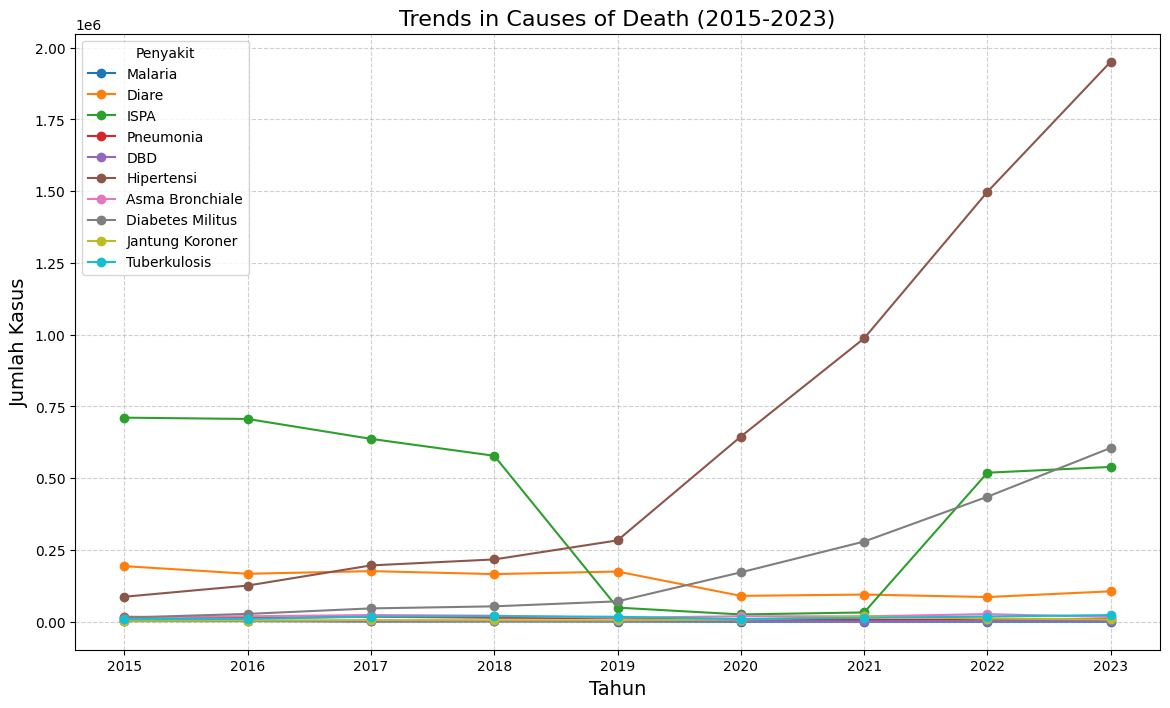

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi tren waktu
plt.figure(figsize=(14, 8))

# Loop untuk membuat plot per penyakit
for column in data.columns[1:]:
    plt.plot(data['Tahun'], data[column], marker='o', label=column)

plt.title('Trends in Causes of Death (2015-2023)', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Jumlah Kasus', fontsize=14)
plt.legend(title="Penyakit", fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Korelasi antara Diabetes Militus dan Hipertensi: 1.00
Korelasi antara Diare dan Malaria: 0.81
Korelasi antara Diare dan Pneumonia: 0.95
Korelasi antara Jantung Koroner dan Pneumonia: -0.74
Korelasi antara Diabetes Militus dan Malaria: -0.70
Korelasi antara Diabetes Militus dan Diare: -0.78
Korelasi antara Hipertensi dan Malaria: -0.72
Korelasi antara Diare dan Hipertensi: -0.80
Korelasi antara Diare dan Jantung Koroner: -0.76
Korelasi antara Malaria dan Pneumonia: 0.76


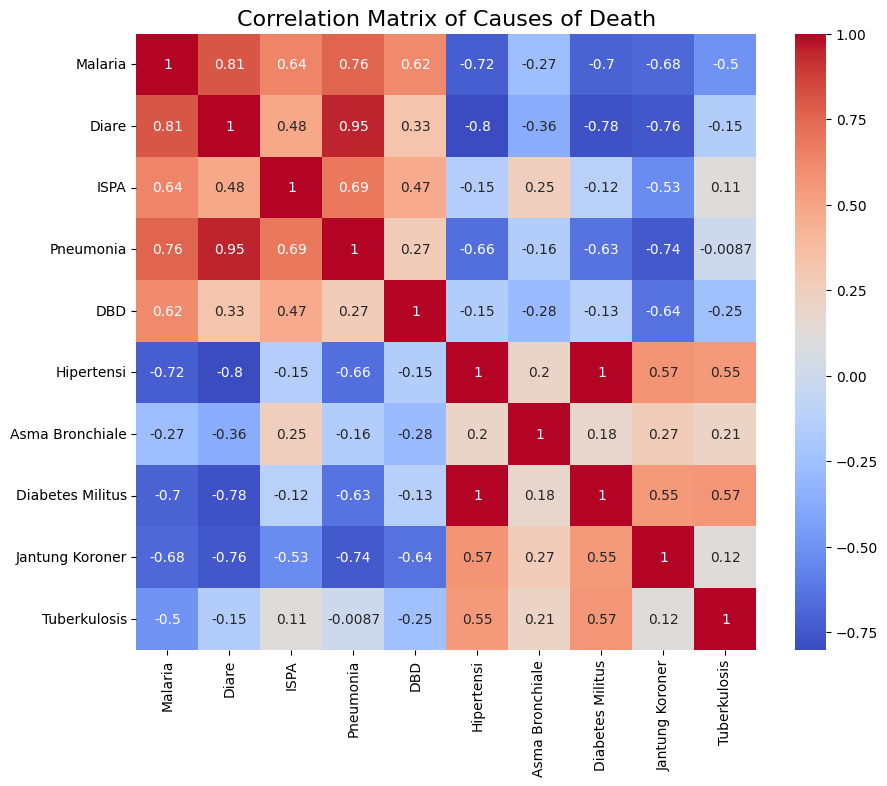

In [ ]:
# Ambang batas korelasi
threshold = 0.7

# Hitung matriks korelasi (tanpa kolom Tahun)
correlation_matrix = data.drop(columns=['Tahun']).corr()

# Temukan pasangan dengan korelasi kuat
strong_correlations = []

for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if col != idx:  # Hindari korelasi variabel dengan dirinya sendiri
            corr_value = correlation_matrix.loc[idx, col]
            if abs(corr_value) > threshold:
                strong_correlations.append((idx, col, corr_value))

# Hilangkan duplikasi (karena matriks simetris)
unique_correlations = set(tuple(sorted(item[:2])) + (item[2],) for item in strong_correlations)

# Tampilkan hasil
for item in unique_correlations:
    print(f"Korelasi antara {item[0]} dan {item[1]}: {item[2]:.2f}")


# Visualisasi korelasi (opsional, menggunakan seaborn)
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Causes of Death', fontsize=16)
plt.show()


In [ ]:
print(data.drop(columns=['Tahun']).describe())

           Malaria          Diare           ISPA     Pneumonia          DBD  \
count     9.000000       9.000000       9.000000      9.000000     9.000000   
mean    760.444444  139402.666667  422001.666667  11529.888889  2565.888889   
std     851.884692   43929.910926  297161.248478   4499.497151   857.137160   
min      25.000000   86008.000000   25366.000000   5484.000000  1135.000000   
25%      51.000000   94653.000000   49158.000000   7814.000000  2359.000000   
50%     607.000000  166002.000000  539327.000000  12667.000000  2754.000000   
75%    1002.000000  174808.000000  637096.000000  14083.000000  2854.000000   
max    2179.000000  193699.000000  710988.000000  17344.000000  3854.000000   

         Hipertensi  Asma Bronchiale  Diabetes Militus  Jantung Koroner  \
count  9.000000e+00         9.000000          9.000000         9.000000   
mean   6.656571e+05     19122.500000     189477.555556      7580.500000   
std    6.747472e+05      4101.864088     209741.792406      475

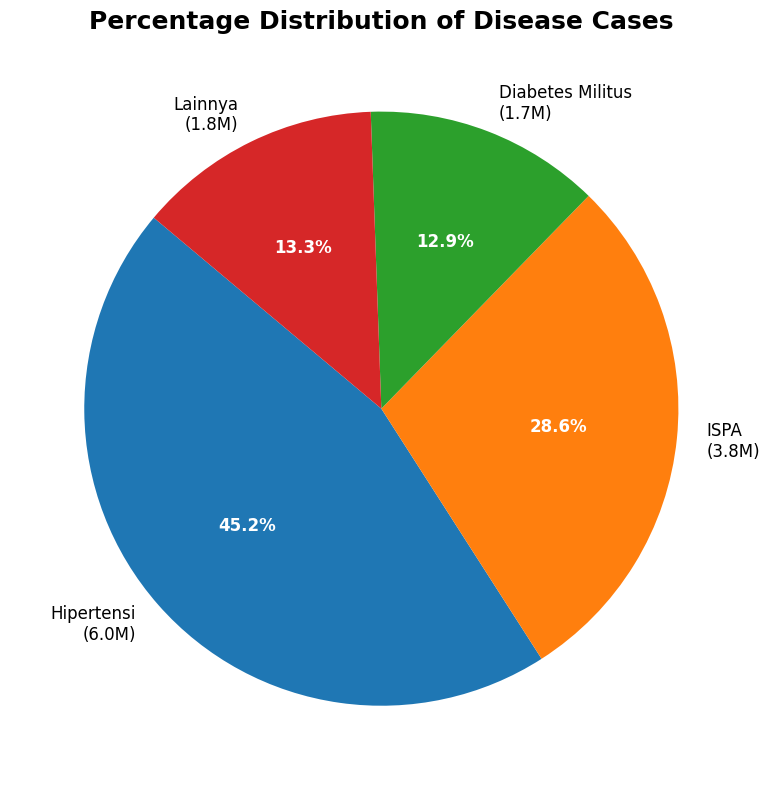

In [ ]:
import matplotlib.pyplot as plt

# Hitung top 3 penyakit dan kategori "Lainnya"
top_3 = total_cases.iloc[:3]
other_sum = total_cases.iloc[3:].sum()

# Tambahkan kategori "Lainnya"
top_3 = pd.concat([top_3, pd.Series([other_sum], index=['Lainnya'])])

# Fungsi untuk memformat angka dalam juta (misalnya, 3800000 menjadi 3.8M)
def format_numbers(x):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'  # Format menjadi juta (misalnya, 3.8M)
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'  # Format menjadi ribuan (misalnya, 1.2K)
    else:
        return f'{x:,}'  # Jika tidak mencapai ribuan atau juta, tampilkan seperti biasa

# Warna kuat menggunakan colormap
colors = plt.cm.tab10([0, 1, 2, 3])
# Visualisasi pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    top_3,
    labels=[f'{label}\n({format_numbers(value)})' for label, value in zip(top_3.index, top_3.values)],  # Format angka
    autopct='%1.1f%%',  # Persentase
    startangle=140,
    colors=colors,  # Warna kuat
    textprops={'fontsize': 12},
)

# Atur gaya teks persentase
for autotext in autotexts:
    autotext.set_color('white')  # Teks persentase menjadi putih agar lebih kontras
    autotext.set_fontweight('bold')  # Teks persentase dengan gaya tebal

# Judul dan perbaikan tata letak
plt.title('Percentage Distribution of Disease Cases', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


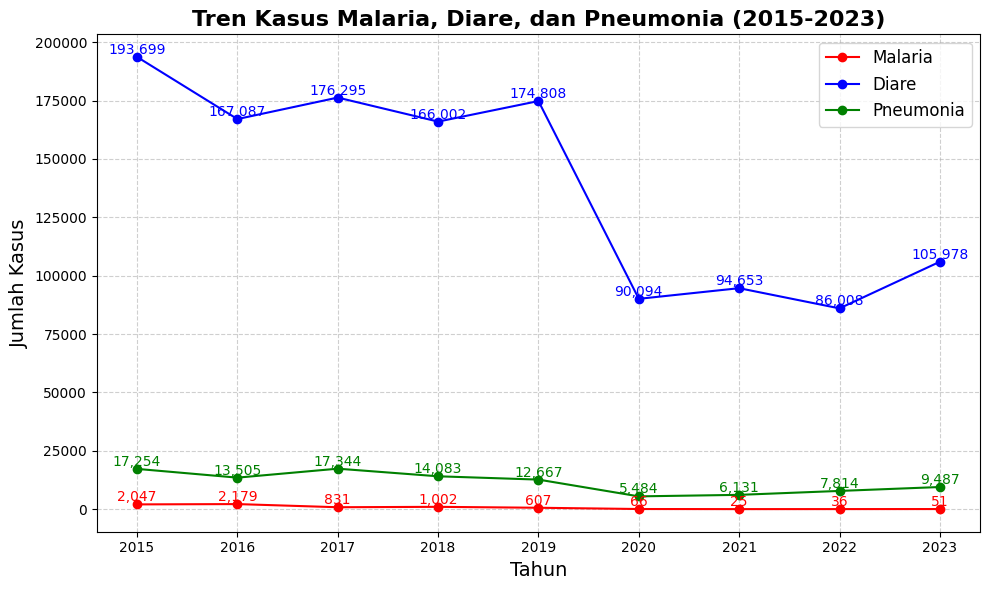

In [ ]:

plt.figure(figsize=(10, 6))

# Plot untuk Malaria
plt.plot(data['Tahun'], data['Malaria'], marker='o', label='Malaria', color='red')
for x, y in zip(data['Tahun'], data['Malaria']):
    plt.text(x, y, f'{y:,}', fontsize=10, ha='center', va='bottom', color='red')  # Label jumlah kasus

# Plot untuk Diare
plt.plot(data['Tahun'], data['Diare'], marker='o', label='Diare', color='blue')
for x, y in zip(data['Tahun'], data['Diare']):
    plt.text(x, y, f'{y:,}', fontsize=10, ha='center', va='bottom', color='blue')  # Label jumlah kasus

# Plot untuk Pneumonia
plt.plot(data['Tahun'], data['Pneumonia'], marker='o', label='Pneumonia', color='green')
for x, y in zip(data['Tahun'], data['Pneumonia']):
    plt.text(x, y, f'{y:,}', fontsize=10, ha='center', va='bottom', color='green')  # Label jumlah kasus

# Judul dan elemen visualisasi lainnya
plt.title('Tren Kasus Malaria, Diare, dan Pneumonia (2015-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Jumlah Kasus', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


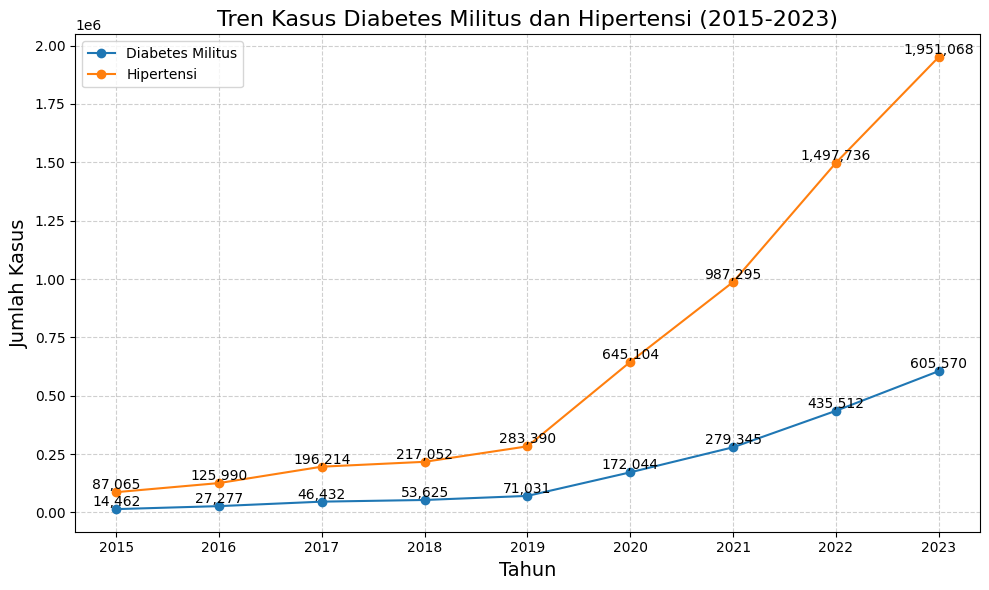

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(data['Tahun'], data['Diabetes Militus'], marker='o', label='Diabetes Militus')
plt.plot(data['Tahun'], data['Hipertensi'], marker='o', label='Hipertensi')

# Menambahkan label jumlah kasus untuk Diabetes Militus
for x, y in zip(data['Tahun'], data['Diabetes Militus']):
    plt.text(x, y, f'{y:,}', fontsize=10, ha='center', va='bottom')  # Format dengan tanda koma

# Menambahkan label jumlah kasus untuk Hipertensi
for x, y in zip(data['Tahun'], data['Hipertensi']):
    plt.text(x, y, f'{y:,}', fontsize=10, ha='center', va='bottom')  # Format dengan tanda koma

# Judul, label, dan elemen visualisasi lainnya
plt.title('Tren Kasus Diabetes Militus dan Hipertensi (2015-2023)', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Jumlah Kasus', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


TES EDA


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
drive.mount('/content/drive')

# Jalur file di Google Drive
file_path = '/content/drive/My Drive/KULIAH SEMSTER 3/TA AVD/avd_penyakit.csv'

# Membaca file CSV
data = pd.read_csv(file_path)

# Statistik deskriptif
print(data.describe())

# Mendeteksi nilai hilang
print(data.isnull().sum())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
             Tahun      Malaria          Diare           ISPA     Pneumonia  \
count     9.000000     9.000000       9.000000       9.000000      9.000000   
mean   2019.000000   760.444444  139402.666667  422001.666667  11529.888889   
std       2.738613   851.884692   43929.910926  297161.248478   4499.497151   
min    2015.000000    25.000000   86008.000000   25366.000000   5484.000000   
25%    2017.000000    51.000000   94653.000000   49158.000000   7814.000000   
50%    2019.000000   607.000000  166002.000000  539327.000000  12667.000000   
75%    2021.000000  1002.000000  174808.000000  637096.000000  14083.000000   
max    2023.000000  2179.000000  193699.000000  710988.000000  17344.000000   

               DBD    Hipertensi  Diabetes Militus  Tuberkulosis  
count     9.000000  9.000000e+00          9.000000      9.000000  
mean   2565.888889  6.656